In [1]:
!pip install top2vec[sentence_transformers]
!pip install top2vec[sentence_encoders]
!pip install tensorflow tensorflow_hub tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 28.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 15.2 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.7 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039270 sha256=ceea7ba9a1016fd2d09a63f1b515e6572b4ff4a8ec163683b083c6d1d8bc9028
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=9b221f1bf6f3b8a

In [2]:
from top2vec import Top2Vec
import pandas as pd
from sklearn.model_selection import train_test_split
import networkx as nx
import matplotlib.pyplot as plt
import csv

In [3]:
df = pd.read_csv('/content/biology_new.csv')
df = df[['text', 'title', 'date', 'link', 'cleaned_text', 'fully_cleaned_text']]
df.head()

text  \
0  FOR THE past four billion years or so the only...   
1  IN A former leatherworks just off Euston Road ...   
2  “How many cells are there in a human being?” I...   
3  LIVING creatures are jolly useful. Farmers rea...   
4  A broken brain, hidden inside a skull, is hard...   

                                               title            date  \
0        The promise and perils of synthetic biology    Apr 4th 2019   
1  Will artificial intelligence help to crack bio...    Jan 7th 2017   
2  The idea of “holobionts” represents a paradigm...   Jun 14th 2023   
3        The remarkable promise of cell-free biology    May 4th 2017   
4  Better brain biology will deliver better medic...   Sep 21st 2022   

                                                link  \
0  https://www.economist.com/leaders/2019/04/04/t...   
1  https://www.economist.com/science-and-technolo...   
2  https://www.economist.com/science-and-technolo...   
3  https://www.economist.com/leaders/2017/05/04/t...   
4  https://www.economist.com/technology-quarterly...   

                                        cleaned_text  \
0  for the past four billion years or so the only...   
1  in a former leatherworks just off euston road ...   
2   how many cells are there in a human being  it...   
3  living creatures are jolly useful farmers rear...   
4  a broken brain hidden inside a skull is harder...   

                                  fully_cleaned_text  
0  past four billion years way life earth produce...  
1  former leatherworks euston road london hopeful...  
2  many cells human sounds like question nerdy pu...  
3  living creatures jolly useful farmers rear ani...  
4  broken brain hidden inside skull harder diagno...

In [4]:
# не рабиваем текст на обучаемую и тестовую части, так как объем корпуса незначителен
X_train = df.loc[:, 'fully_cleaned_text'].values

In [ ]:
# Создание экземпляра модели Top2Vec
model = Top2Vec(X_train, embedding_model='universal-sentence-encoder')

In [6]:
# Загрузка модели из файла
model = Top2Vec.load("top2vec_model")

Тема 0: ['tumours' 'risks' 'least' 'worse' 'earlier' 'risk' 'latest' 'smallpox'
 'hardly' 'doubt' 'darwin' 'decades' 'lies' 'failed' 'lower' 'blue'
 'australia' 'quantum' 'said' 'favour' 'ones' 'total' 'controversial'
 'advanced' 'previous' 'almost' 'greater' 'memory' 'nearly' 'largest'
 'fall' 'biggest' 'debate' 'letters' 'spike' 'mainly' 'told' 'months'
 'aids' 'nobel' 'claims' 'unlikely' 'genomes' 'advances' 'later'
 'probably' 'surely' 'harm' 'generally' 'ebola']
Тема 1: ['smallpox' 'tumours' 'australia' 'worse' 'ebola' 'vaccinated' 'blue'
 'latest' 'vaccines' 'aids' 'risks' 'biotech' 'darwin' 'advanced'
 'earlier' 'quantum' 'least' 'mainly' 'mostly' 'analysed' 'infect'
 'claims' 'ones' 'caused' 'viruses' 'africa' 'immune' 'genomes' 'liver'
 'tumour' 'patents' 'viral' 'lies' 'vaccination' 'therapies' 'epidemic'
 'hardly' 'said' 'generally' 'virus' 'pandemic' 'risk' 'others' 'none'
 'memory' 'general' 'failed' 'variants' 'decades' 'fall']
Тема 2: ['coelacanth' 'ecology' 'biologists'

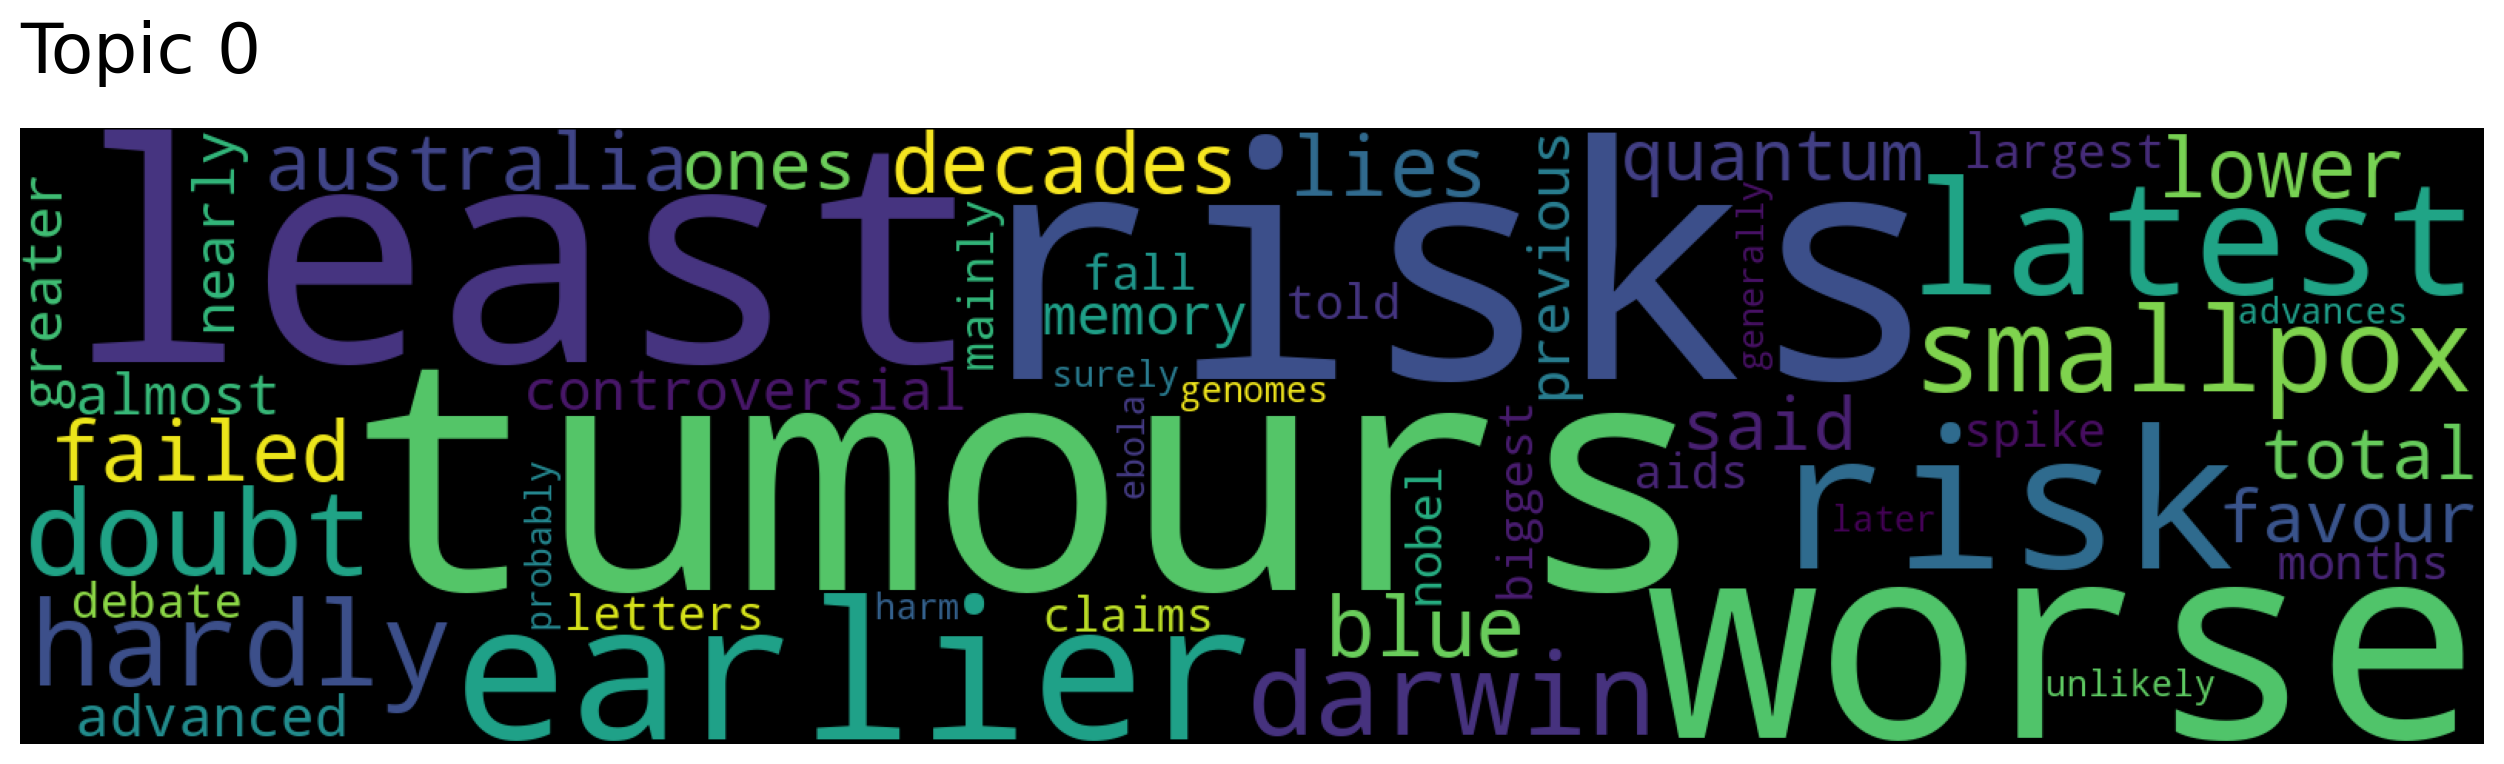

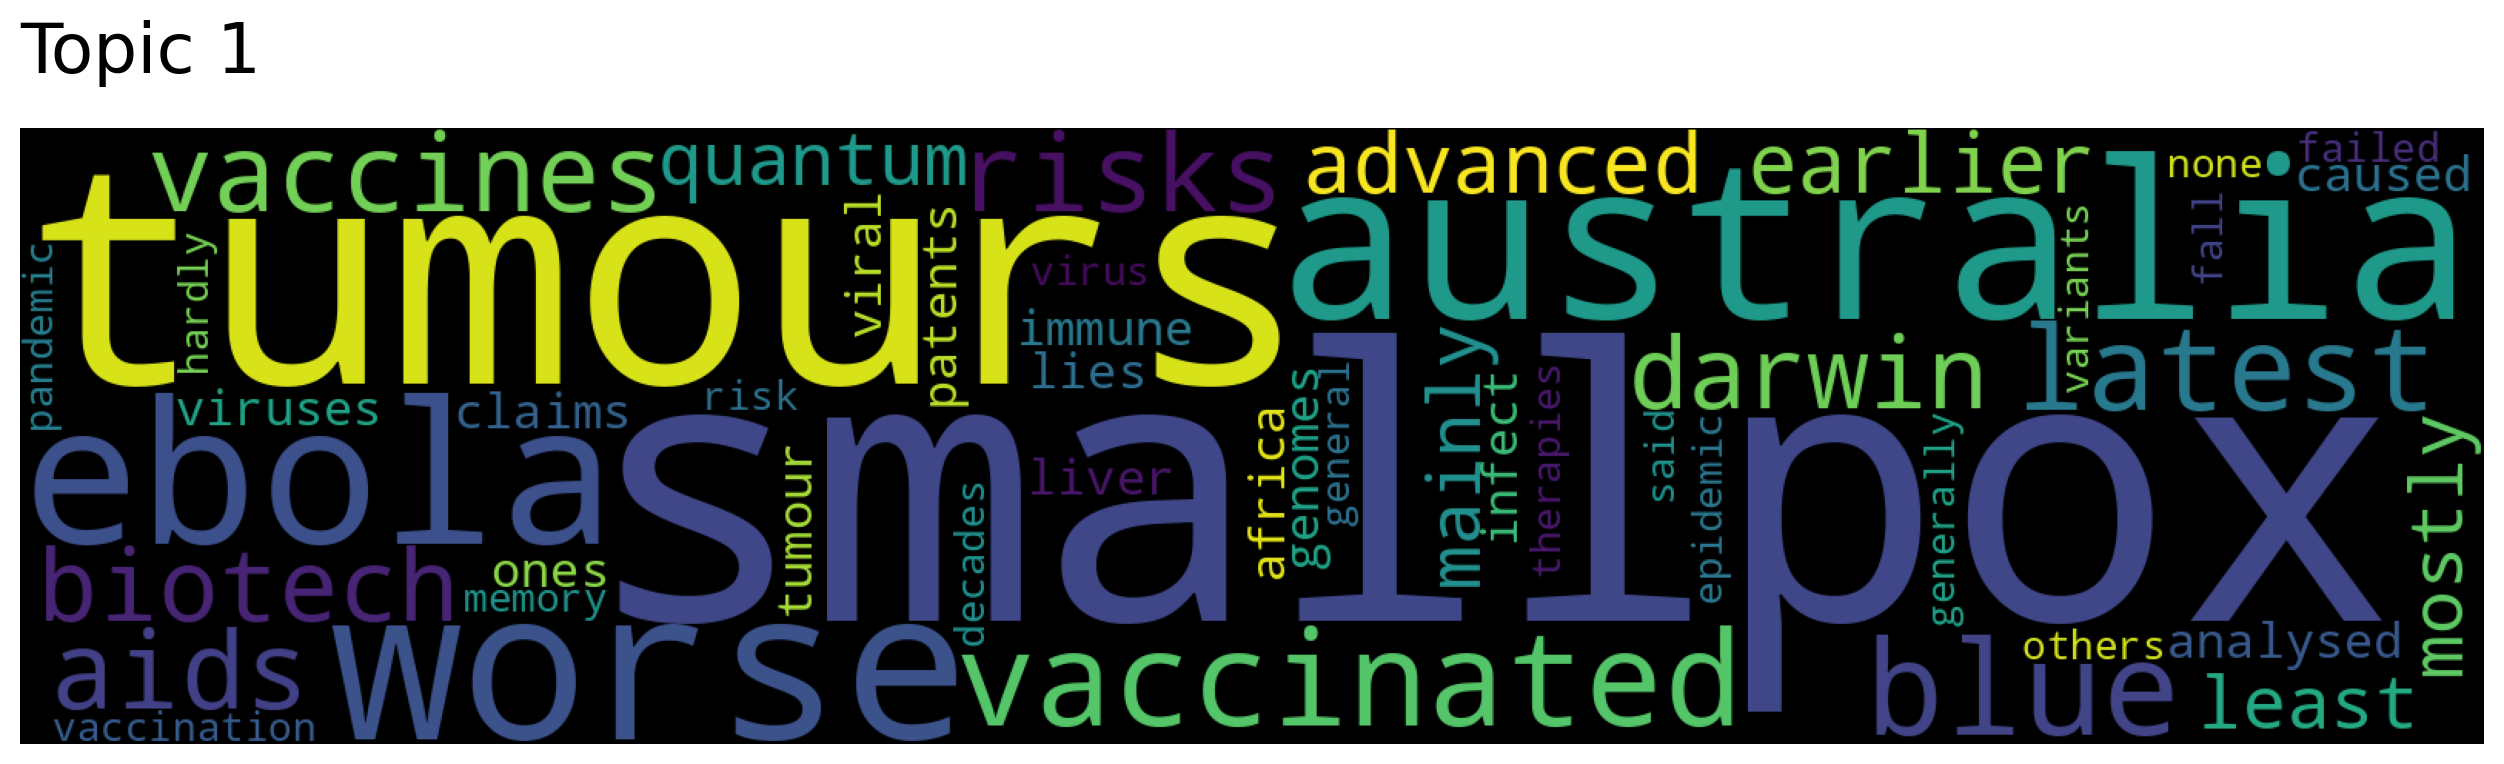

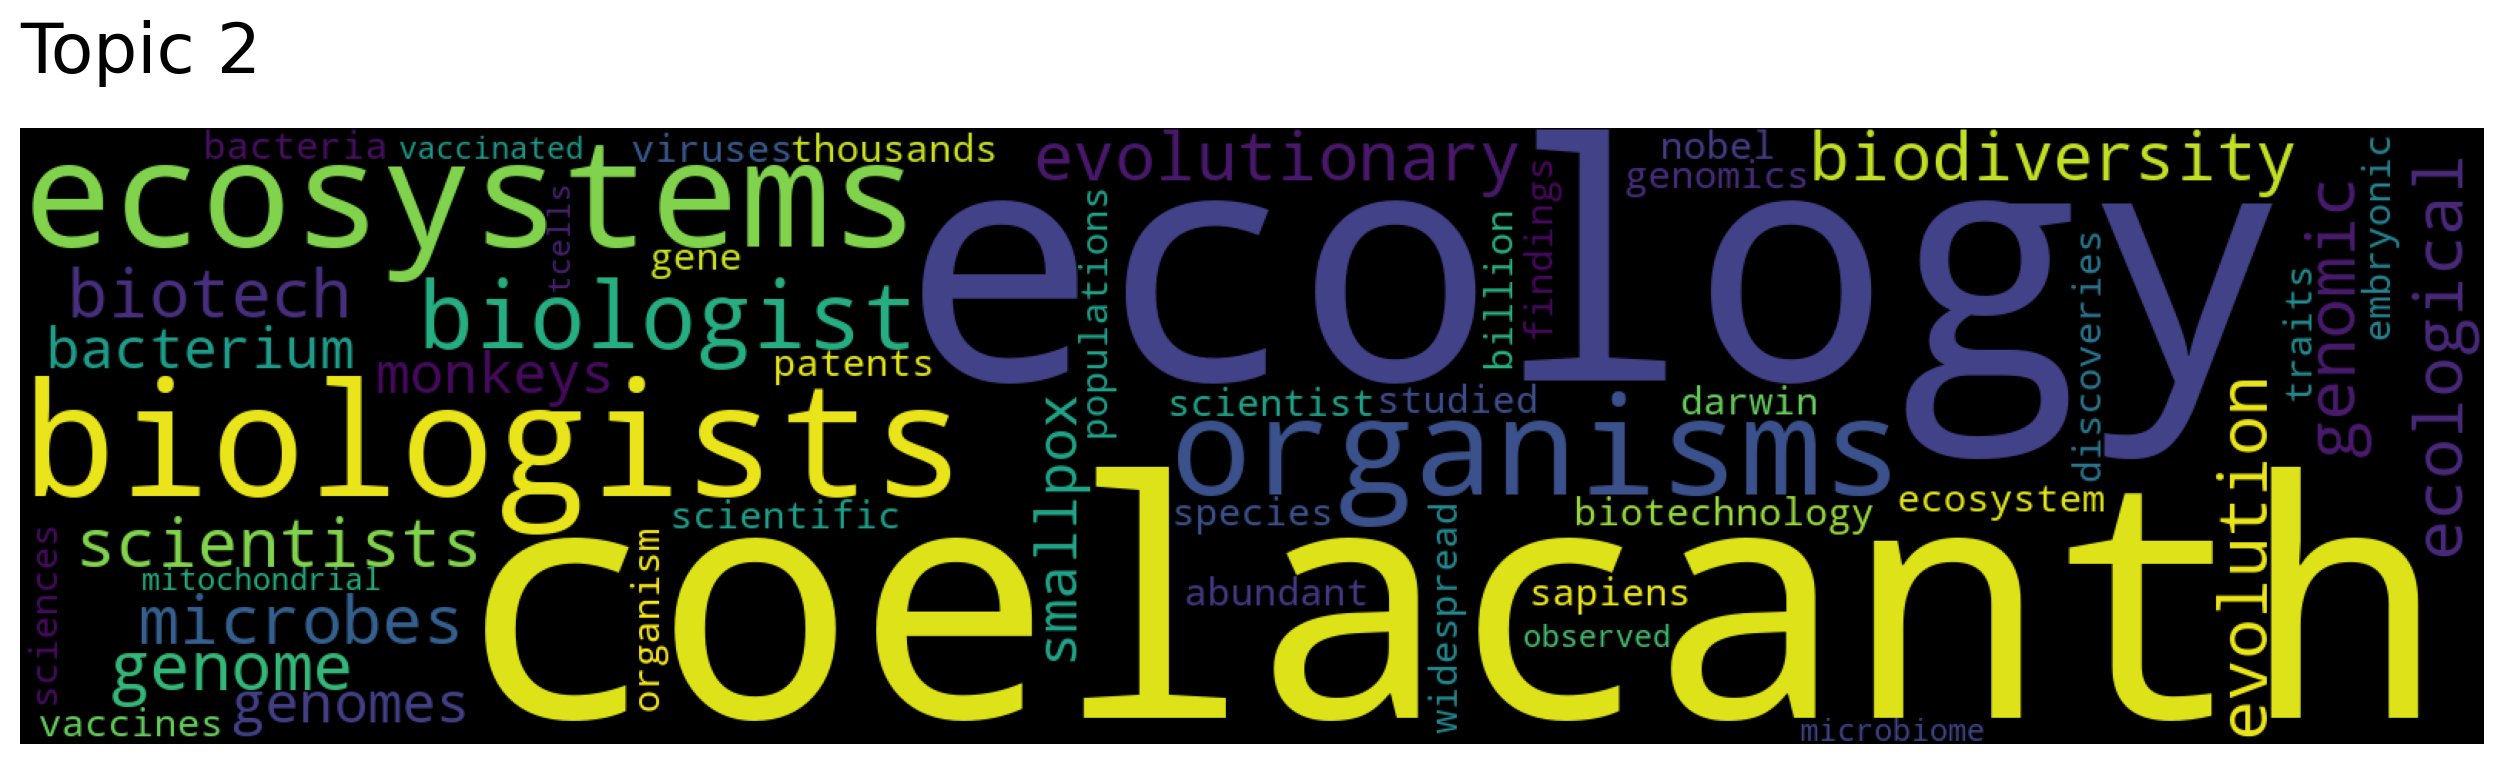

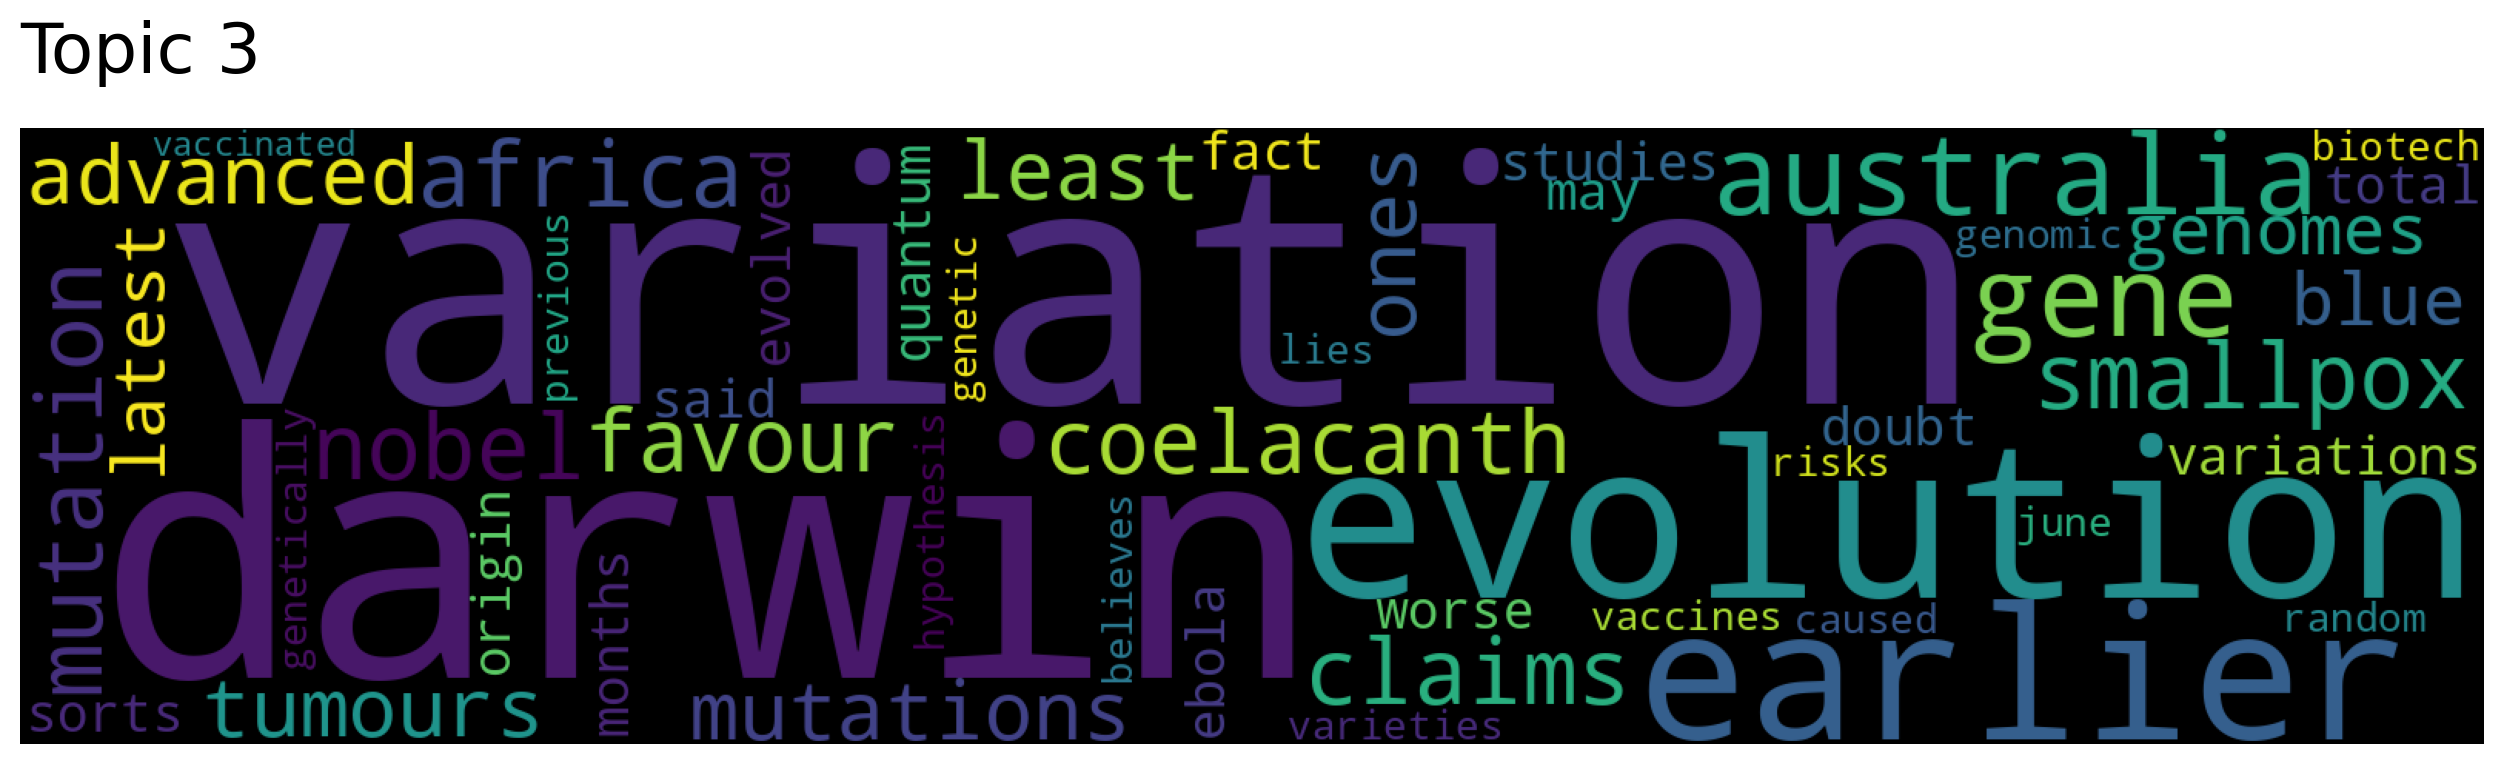

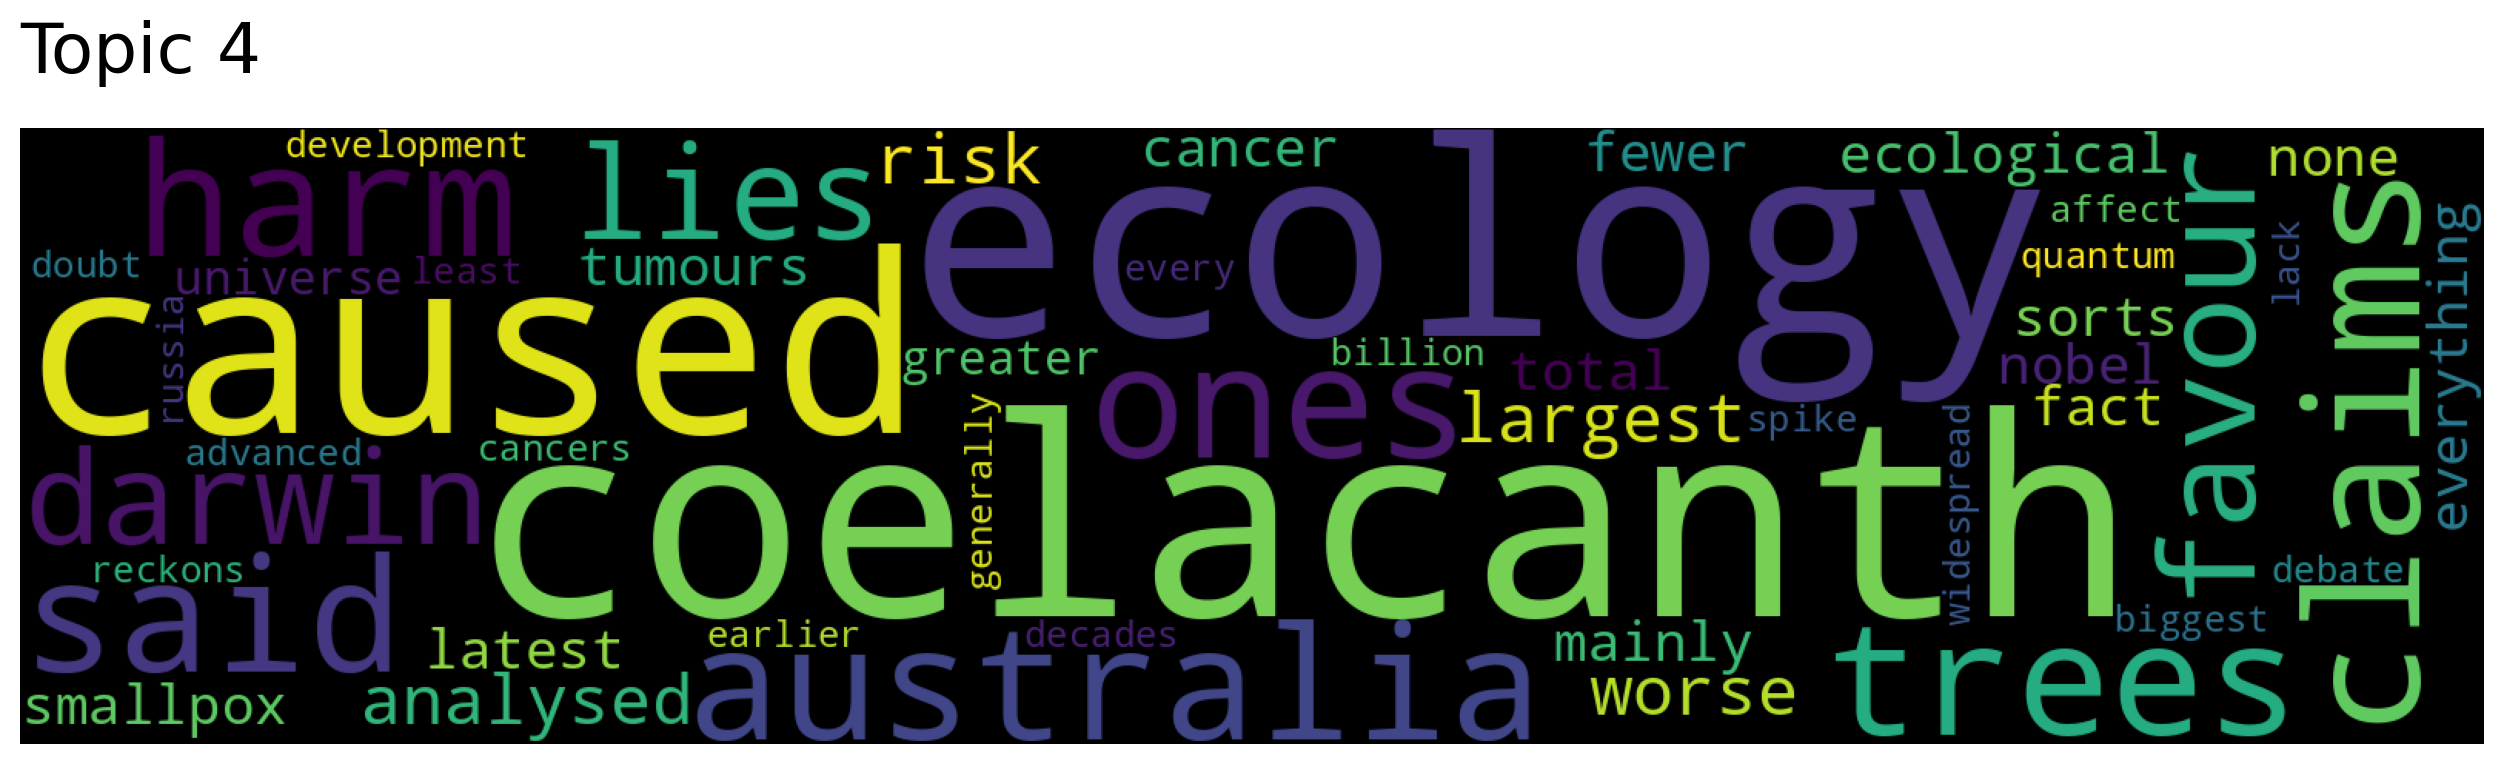

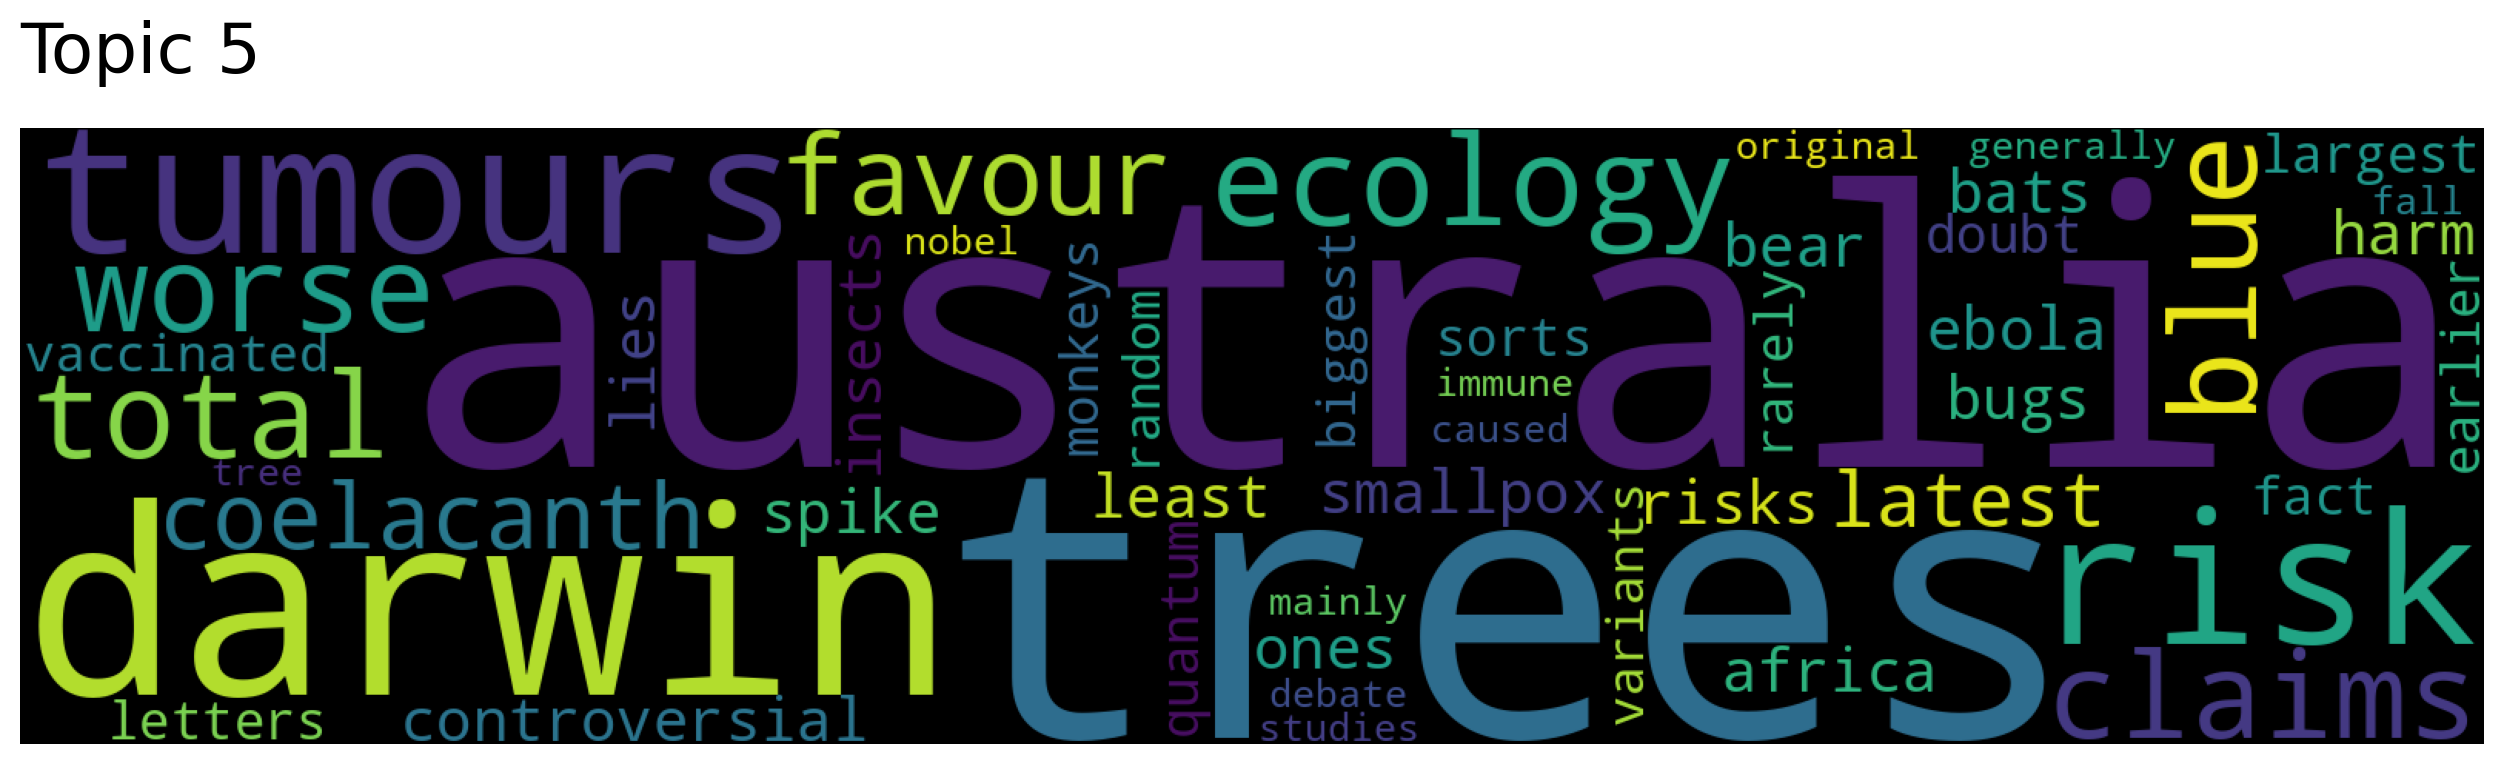

In [7]:
# Вывод количества тем
num_topics = model.get_num_topics()

# Слова и оценки слов для каждой темы
topic_words, word_scores, topic_nums = model.get_topics()

# Вывод темы и соответствующие ей слова
for topic_num, words in zip(topic_nums, topic_words):
    print(f"Тема {topic_num}: {words}")

# Генерация облака слов для каждой темы
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

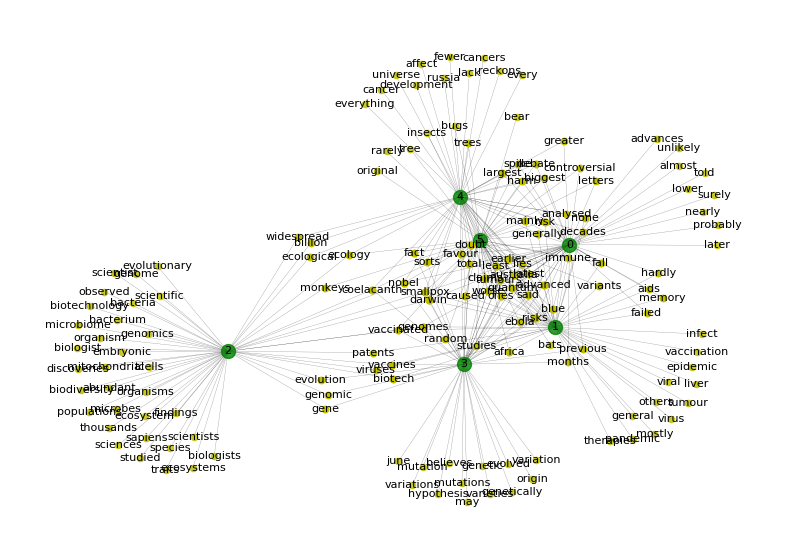

In [9]:
# Создаем граф
G = nx.Graph()

# Добавляем узлы (темы) в граф
for topic_num in topic_nums:
    G.add_node(topic_num)

# Добавляем ребра между темами и словами
for i, topic_num in enumerate(topic_nums):
    for j, word in enumerate(topic_words[i]):
        G.add_edge(topic_num, word)

# Располагаем узлы на графе
pos = nx.spring_layout(G)

plt.figure(figsize=(10, 7))

# Рисуем узлы (темы и слова)
nx.draw_networkx_nodes(G, pos, nodelist=topic_nums, node_color='g', node_size=100, alpha=0.8)
nx.draw_networkx_nodes(G, pos, nodelist=[word for sublist in topic_words for word in sublist], node_color='y', node_size=20, alpha=0.8)

# Рисуем ребра
nx.draw_networkx_edges(G, pos, width=0.2, alpha=0.5)

# Рисуем метки узлов (темы и слова)
nx.draw_networkx_labels(G, pos, font_size=8, font_family="sans-serif")

# Показываем граф
plt.axis('off')
plt.show()

In [25]:
# Граф можно сохранить в DataFrame

# Для переменных topic_nums и topic_words создаем список связей между темами и словами
edges = []
for i, topic_num in enumerate(topic_nums):
    for word in topic_words[i]:
        edges.append((topic_num, word))

# Записываем данные в CSV файл
with open('data.csv', 'w', newline='') as csvfile:
    fieldnames = ['Nodes', 'Label']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for edge in edges:
        writer.writerow({'Nodes': edge[0], 'Label': edge[1]})